In [1]:
%reload_ext autoreload
%autoreload 2

# 0.02: Evaluation T-Errors

We can plot the t-error for members and non-members from the diffusion model evaluation dataset. First, we load the data, and output the sizes.

In [2]:
from quantile_diffusion_mia.config import DATASET_CONFIG

dataset = "CIFAR10"
config = DATASET_CONFIG[dataset]

2024-11-18 22:18:46.328 | INFO     | quantile_diffusion_mia.config:<module>:11 - PROJ_ROOT path is: /work3/nkale/ml-projects/quantile-diffusion-mia


In [3]:
import torch
import numpy as np
from quantile_diffusion_mia.dataset import QuantileRegressionDataset
from quantile_diffusion_mia.config import DATASET_CONFIG, MODEL_CONFIG

dataset_name = "CIFAR10"
config = DATASET_CONFIG[dataset_name]

# Load the eval indices
split_path = "../" + config['quantile_regression_split_path']
output = np.load(split_path)
quantile_eval_indices = output['quantile_eval_indices']

# Load the dataset
data_path = "../" + config['quantile_regression_data_path']
full_dataset = QuantileRegressionDataset.load(data_path)
full_dataset.set_indices(quantile_eval_indices)

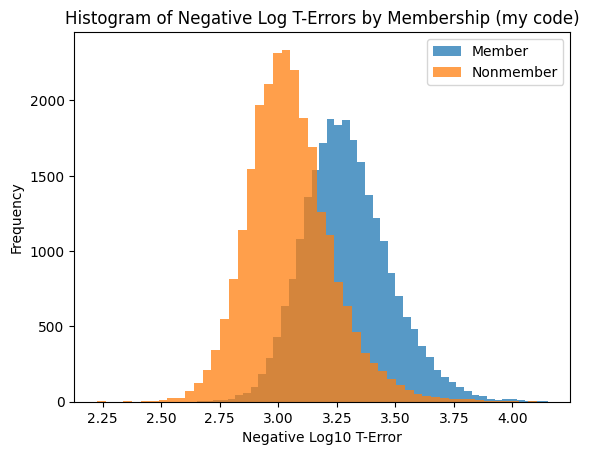

In [4]:
import matplotlib.pyplot as plt

# Convert labels to numpy array for easier indexing
labels = np.array(full_dataset.labels)

# Filter t_errors by labels
member_t_errors = full_dataset.t_errors[labels == 'member'].cpu().numpy() * 32 * 32 * 3
nonmember_t_errors = full_dataset.t_errors[labels == 'nonmember'].cpu().numpy() * 32 * 32 * 3

# Compute negative log likelihoods
member_nll = -np.log10(member_t_errors)
nonmember_nll = -np.log10(nonmember_t_errors)

# Plot histograms of negative log likelihoods
plt.hist(member_nll, bins=50, alpha=0.75, label='Member')
plt.hist(nonmember_nll, bins=50, alpha=0.75, label='Nonmember')
plt.title('Histogram of Negative Log T-Errors by Membership (my code)')
plt.xlabel('Negative Log10 T-Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()